In [33]:
import seaborn as sns
import pandas as pd

df = pd.read_csv("datasets/bv-web-analytics.csv")

df.head()

,ip,date,email,route,scroll_pct,time_spent,referrer,device
0,8.8.194.182,20/01/2027,NaN,/instituicoes,75.42,191,chrome,desktop
1,8.8.157.95,24/09/2026,joao.rodrigues@globo.com,/,70.68,158,firefox,mobile
2,189.15.202.241,20/01/2026,l.santos@protonmail.com,/,31.72,206,chrome,mobile
3,8.8.18.24,21/06/2027,mariasantos@live.com,/,56.41,107,chrome,mobile
4,1.1.210.196,09/06/2026,beatriz.lima74@protonmail.com,/cursos,49.69,175,chrome,mobile


<Axes: >

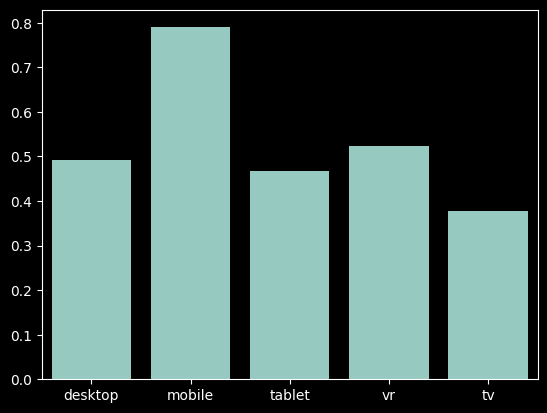

In [50]:
device_ratios = {}
device_counts = {}
for device in df["device"].unique():
    _df = df.loc[df["device"] == device]

    count = len(_df)
    signup_ratio = len(_df.loc[~_df["email"].isna()]) / count

    device_counts[device] = count
    device_ratios[device] = signup_ratio

# sns.barplot(data=device_counts)
sns.barplot(data=device_ratios)

<Axes: xlabel='ratio', ylabel='referrer'>

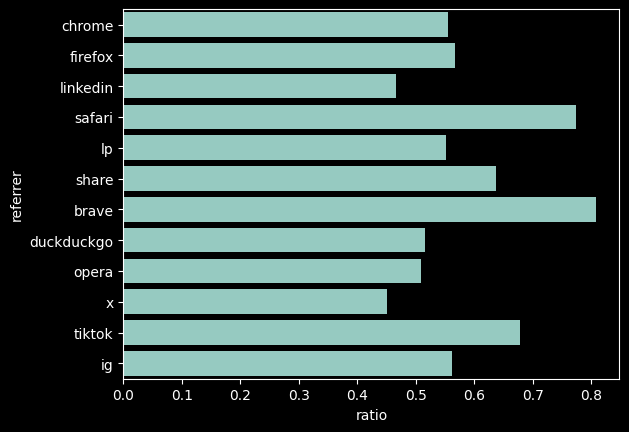

In [ ]:
referrer_ratios = []
referrer_counts = []
for referrer in df["referrer"].unique():
    _df = df.loc[df["referrer"] == referrer]

    count = len(_df)
    signup_ratio = len(_df.loc[~_df["email"].isna()]) / count

    referrer_counts.append({"referrer": referrer, "count": count})
    referrer_ratios.append({"referrer": referrer, "ratio": signup_ratio})

sns.barplot(data=pd.DataFrame(referrer_counts), x="count", y="referrer")
sns.barplot(data=pd.DataFrame(referrer_ratios), x="ratio", y="referrer")

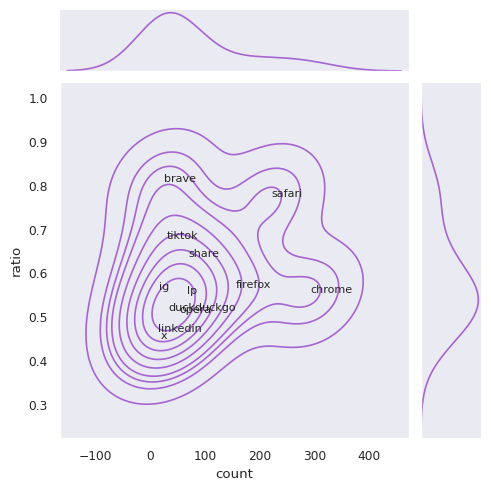

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("dark")

# Build DataFrames
counts_df = pd.DataFrame(referrer_counts)
ratios_df = pd.DataFrame(referrer_ratios)

# Merge on referrer
df_joined = counts_df.merge(ratios_df, on="referrer")

# Jointplot-like layout
g = sns.jointplot(
    data=df_joined,
    x="count",
    y="ratio",
    kind="kde",
    height=5,
    color="#a566d2",
)

sns.set_style("dark")


# Optionally, label the points with referrer names
for _, row in df_joined.iterrows():
    g.ax_joint.text(row["count"], row["ratio"], row["referrer"], fontsize=8)

# sns.color_palette("mako")

plt.show()